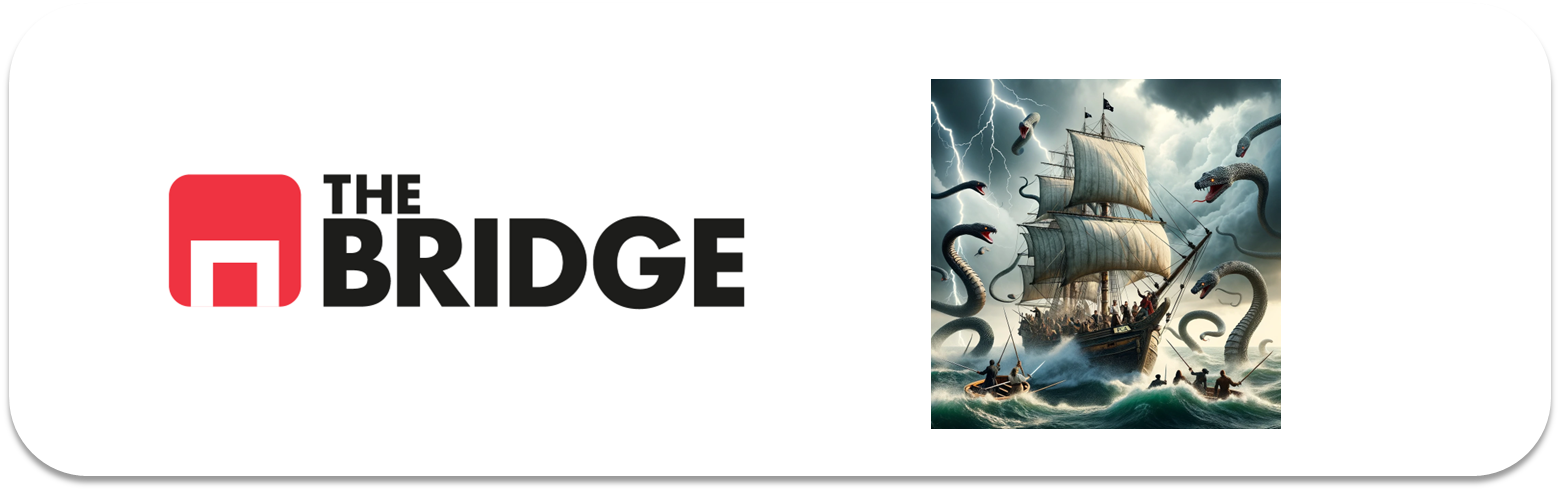

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificación sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df_credit_og=pd.read_csv("./data/credit_npo.csv")
df_credit_og

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df_credit=df_credit_og.copy().dropna(axis="index")

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [5]:
df_credit.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10314
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11472
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

In [6]:
#Hacer un bulcle for o funcion que convierta en categoricas las columnas NumberOf con un apply usando la media o mediana como umbral y que debe ser calculada dentro del bucle o funcion 
def categoriza(valor, media):
    return f"> {media}" if valor > media else f"<= {media}"

changing_cols=[]
for col in df_credit.columns:
    if "Number" in col:  
        media = int(round(df_credit[col].mean(), 0))
        print(f"media de {col}: {media}")
        df_credit[col] = df_credit[col].apply(categoriza, args=(media,))
        changing_cols.append(col)

media de NumberOfTime30-59DaysPastDueNotWorse: 0
media de NumberOfOpenCreditLinesAndLoans: 9
media de NumberOfTimes90DaysLate: 0
media de NumberRealEstateLoansOrLines: 1
media de NumberOfTime60-89DaysPastDueNotWorse: 0
media de NumberOfDependents: 1


In [7]:
changing_cols

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [8]:
df_credit[changing_cols] #Les voy a hacer un get_dummies pero conservando solo 1 de las opciones dado que son binarias todas y dos columna darían la misma info

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,<= 0,> 9,> 0,<= 1,<= 0,<= 1
1,<= 0,<= 9,<= 0,<= 1,<= 0,<= 1
2,<= 0,<= 9,<= 0,<= 1,<= 0,> 1
3,<= 0,<= 9,<= 0,> 1,<= 0,> 1
4,<= 0,<= 9,<= 0,<= 1,<= 0,<= 1
...,...,...,...,...,...,...
12532,<= 0,<= 9,<= 0,<= 1,<= 0,<= 1
12533,<= 0,> 9,<= 0,<= 1,<= 0,<= 1
12534,<= 0,<= 9,<= 0,> 1,<= 0,> 1
12535,<= 0,<= 9,<= 0,<= 1,<= 0,<= 1


In [9]:
df_credit= pd.get_dummies(df_credit,columns=changing_cols,dtype=int,drop_first=True)
df_credit.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome',
       'NumberOfTime30-59DaysPastDueNotWorse_> 0',
       'NumberOfOpenCreditLinesAndLoans_> 9', 'NumberOfTimes90DaysLate_> 0',
       'NumberRealEstateLoansOrLines_> 1',
       'NumberOfTime60-89DaysPastDueNotWorse_> 0', 'NumberOfDependents_> 1'],
      dtype='object')

In [10]:
target='SeriousDlqin2yrs'
features_num=['RevolvingUtilizationOfUnsecuredLines', 'age','DebtRatio', 'MonthlyIncome']
features_cat=['NumberOfTime30-59DaysPastDueNotWorse_> 0','NumberOfOpenCreditLinesAndLoans_> 9', 'NumberOfTimes90DaysLate_> 0','NumberRealEstateLoansOrLines_> 1','NumberOfTime60-89DaysPastDueNotWorse_> 0', 'NumberOfDependents_> 1']
df_credit[features_cat]

,NumberOfTime30-59DaysPastDueNotWorse_> 0,NumberOfOpenCreditLinesAndLoans_> 9,NumberOfTimes90DaysLate_> 0,NumberRealEstateLoansOrLines_> 1,NumberOfTime60-89DaysPastDueNotWorse_> 0,NumberOfDependents_> 1
0,0,1,1,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,1,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
12532,0,0,0,0,0,0
12533,0,1,0,0,0,0
12534,0,0,0,1,0,1
12535,0,0,0,0,0,0


In [11]:
#COMIENZA EL MINIEDA PRIMERO CON EL ANALISIS VISUAL

In [12]:
train_set,test_set= train_test_split(df_credit,test_size=0.2,random_state=42)

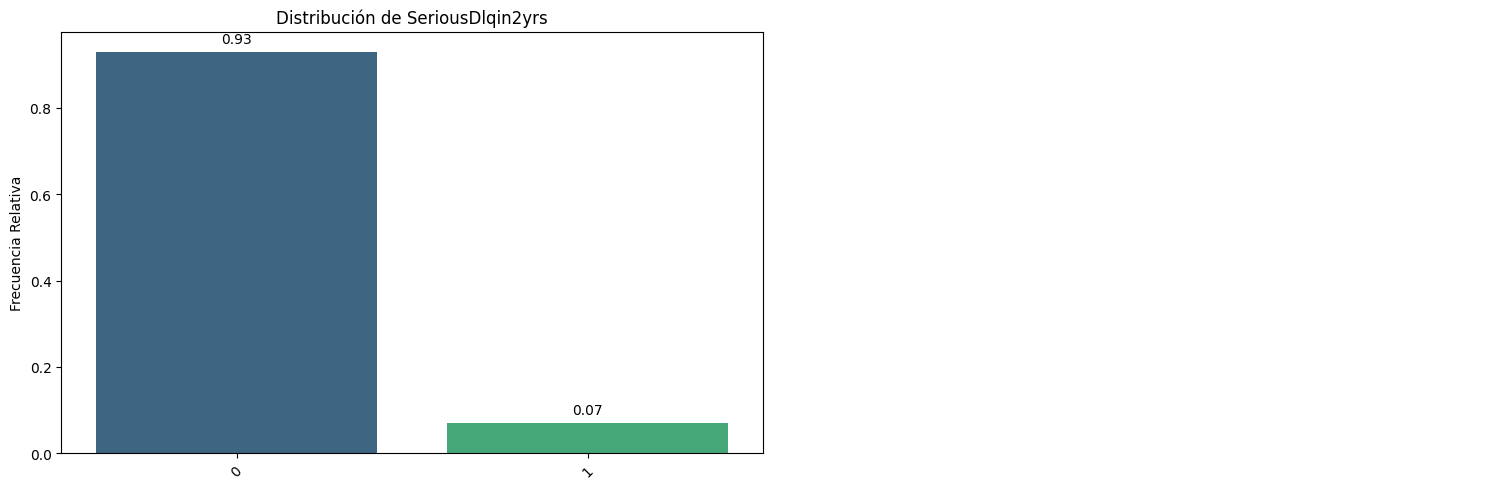

In [13]:
bt.pinta_distribucion_categoricas(train_set,[target],relativa=True,mostrar_valores=True)

NumberOfTime30-59DaysPastDueNotWorse_> 0


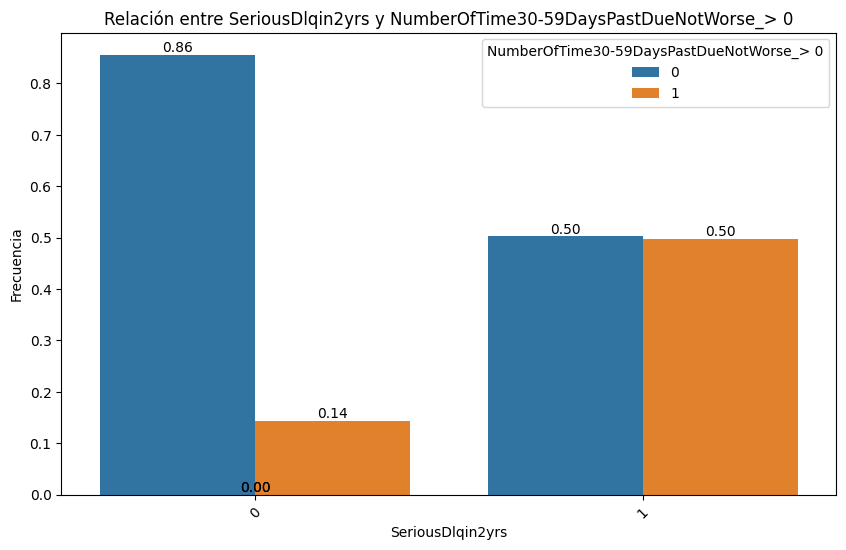

NumberOfOpenCreditLinesAndLoans_> 9


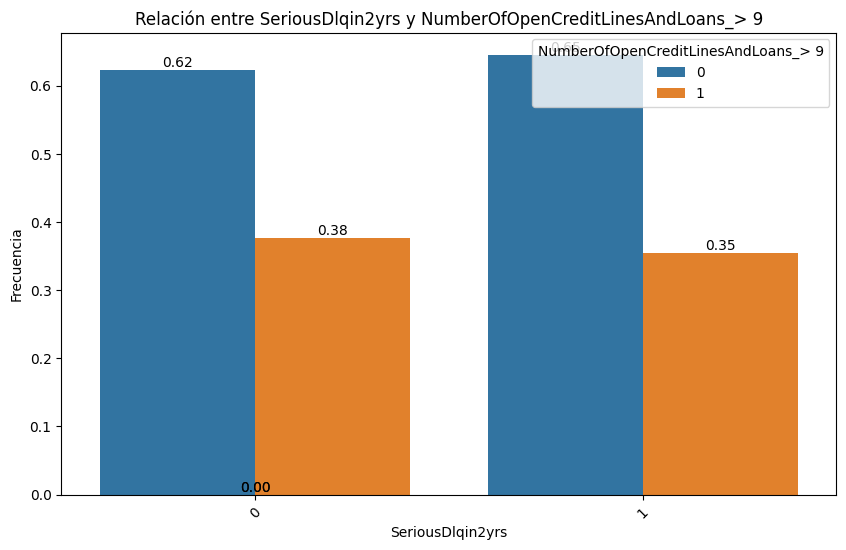

NumberOfTimes90DaysLate_> 0


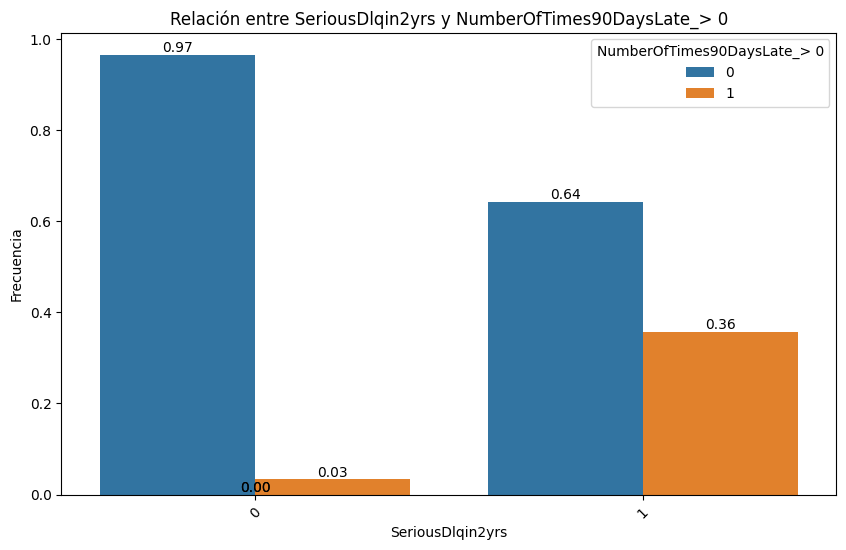

NumberRealEstateLoansOrLines_> 1


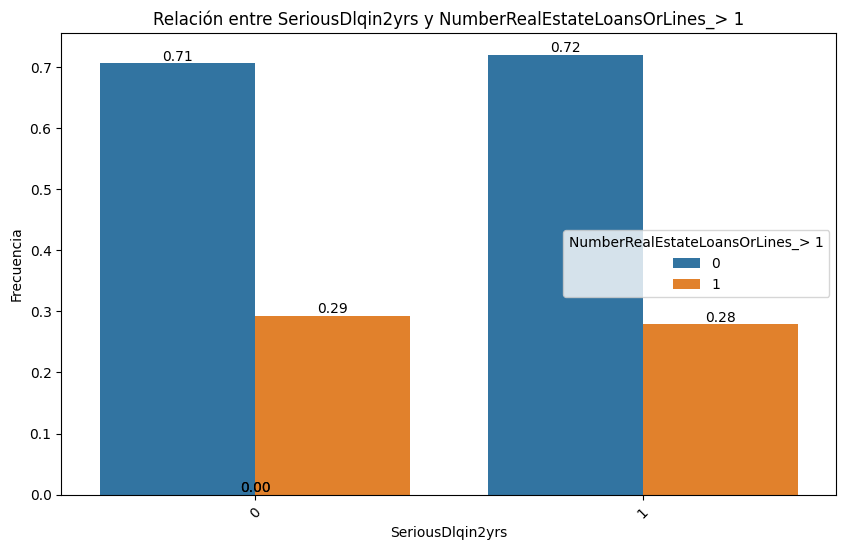

NumberOfTime60-89DaysPastDueNotWorse_> 0


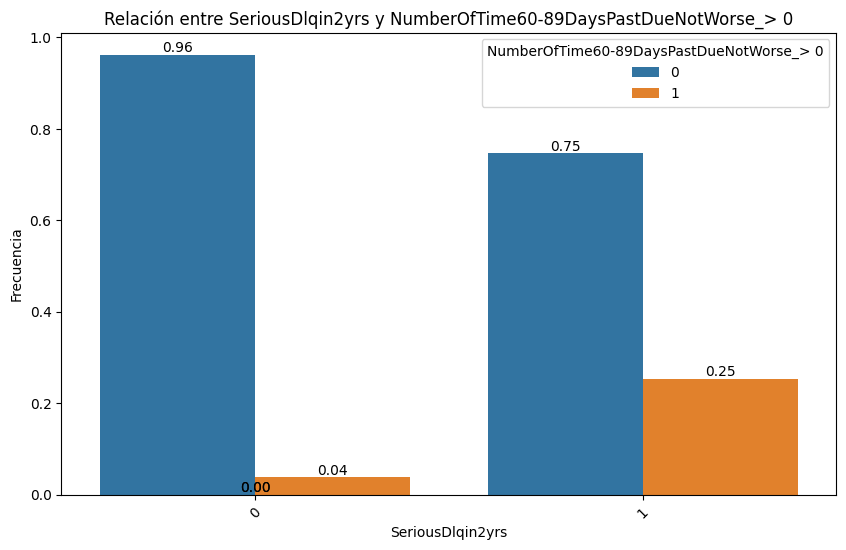

NumberOfDependents_> 1


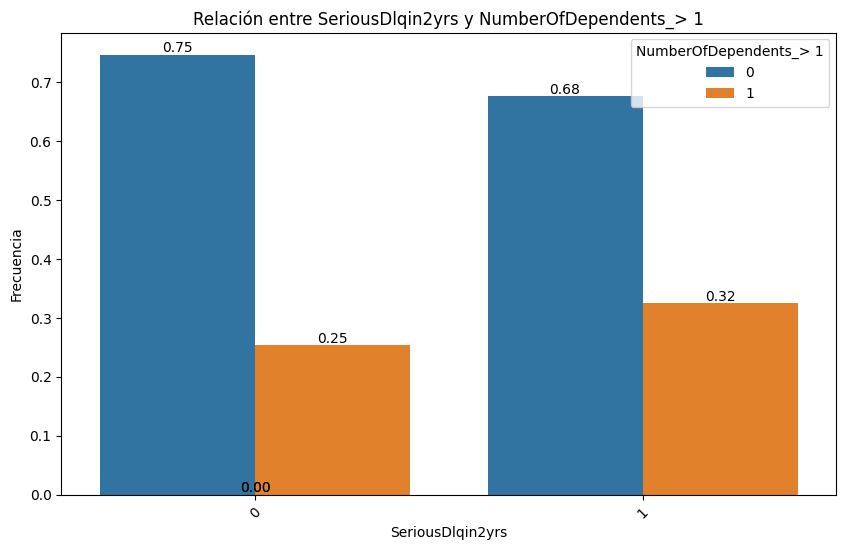

In [14]:
for feat in features_cat:
    print(feat)
    bt.plot_categorical_relationship_fin(train_set,target,feat,show_values=True,relative_freq=True)

In [15]:
descartables_visual=["NumberOfOpenCreditLinesAndLoans_> 9","NumberRealEstateLoansOrLines_> 1"]

RevolvingUtilizationOfUnsecuredLines


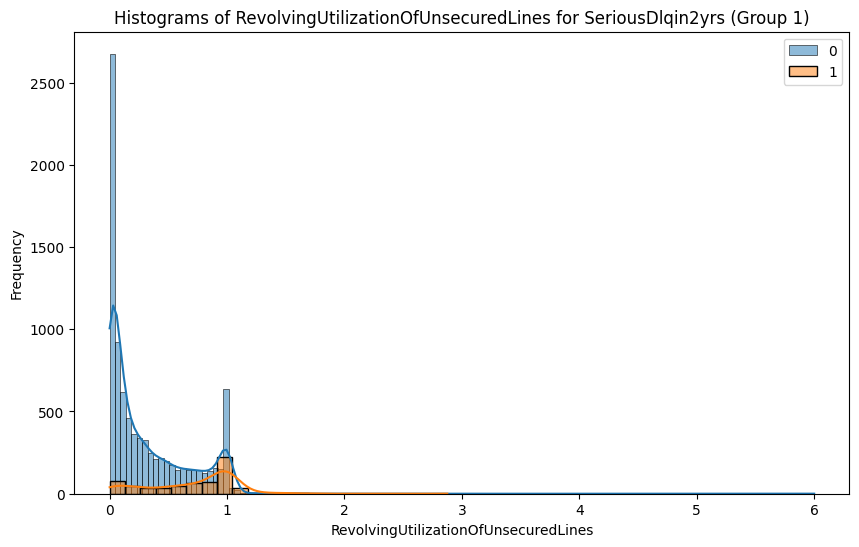

age


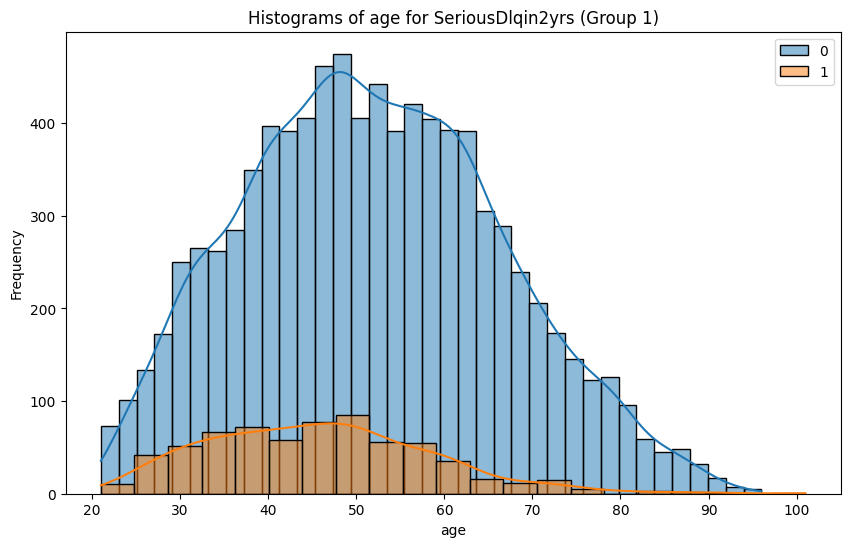

DebtRatio


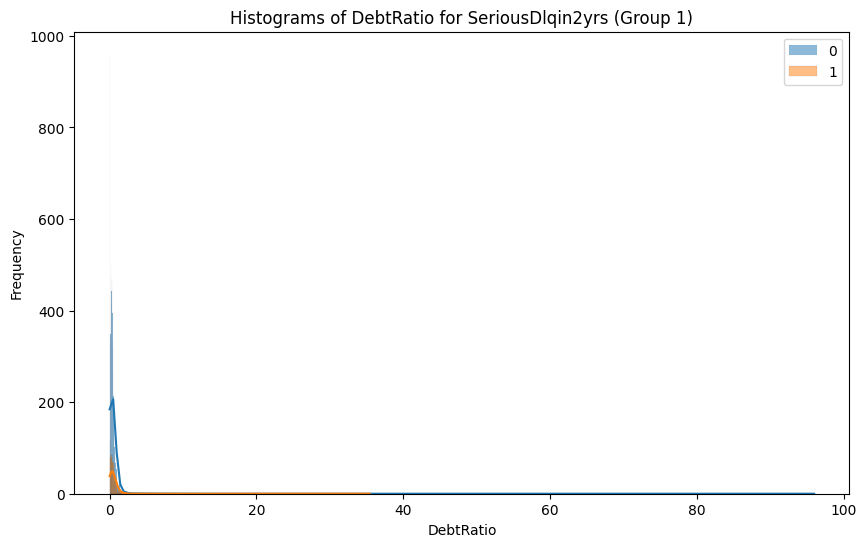

MonthlyIncome


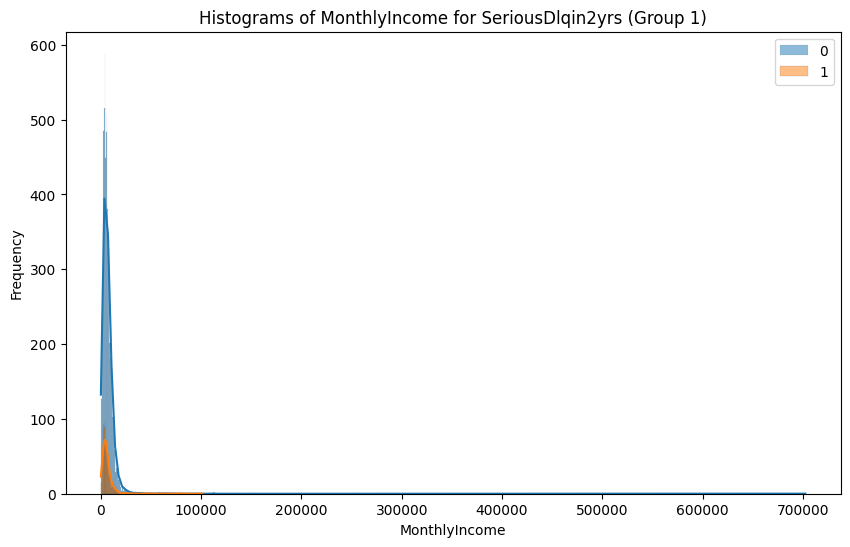

In [16]:
for col in features_num:
    print(col)
    bt.plot_grouped_histograms(train_set,target,col,group_size=2)

In [17]:
#Parecen todas relevantes aunque es dificil entenderse con los graficos
total_features= train_set.drop(columns=target).columns.tolist()
importantes_visual= [col for col in total_features if col not in descartables_visual]
importantes_visual

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse_> 0',
 'NumberOfTimes90DaysLate_> 0',
 'NumberOfTime60-89DaysPastDueNotWorse_> 0',
 'NumberOfDependents_> 1']

In [18]:
lista_votaciones=[importantes_visual]

In [19]:
#SELECCCION MEDIANTE KBEST ANOVA Y MUTUAL INFO

In [20]:
X_train=train_set[total_features]
y_train=train_set[target]

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif 

selector = SelectKBest(f_classif, k=2) #De las numericas quiero las 2 más relevantes por eso establezco k en 2
selector.fit(X_train[features_num], y_train)
selector.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age'], dtype=object)

In [22]:
importantes_estadistica=['RevolvingUtilizationOfUnsecuredLines', 'age']

In [23]:
from sklearn.metrics import mutual_info_score

mi_scores={"features":[],"scores":[]}
for cat in features_cat:
    mi_scores["features"].append(cat)
    mi_scores["scores"].append(mutual_info_score(X_train[cat],y_train))

df_mi_scores=pd.DataFrame(mi_scores)
df_mi_scores=df_mi_scores.sort_values(by="scores",ascending=False)
df_mi_scores #Cogeré los tres mayores valores

,features,scores
2,NumberOfTimes90DaysLate_> 0,0.034215
0,NumberOfTime30-59DaysPastDueNotWorse_> 0,0.022123
4,NumberOfTime60-89DaysPastDueNotWorse_> 0,0.017771
5,NumberOfDependents_> 1,0.000818
1,NumberOfOpenCreditLinesAndLoans_> 9,0.000069
3,NumberRealEstateLoansOrLines_> 1,0.000032


In [24]:
df_mi_scores.features.values

array(['NumberOfTimes90DaysLate_> 0',
       'NumberOfTime30-59DaysPastDueNotWorse_> 0',
       'NumberOfTime60-89DaysPastDueNotWorse_> 0',
       'NumberOfDependents_> 1', 'NumberOfOpenCreditLinesAndLoans_> 9',
       'NumberRealEstateLoansOrLines_> 1'], dtype=object)

In [25]:
importantes_estadistica=['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTimes90DaysLate_> 0','NumberOfTime30-59DaysPastDueNotWorse_> 0','NumberOfTime60-89DaysPastDueNotWorse_> 0']
lista_votaciones.append(importantes_estadistica)

In [26]:
#SELECCIÓN MEDIANTE MODELO INTERMEDIO

In [27]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse_> 0,NumberOfOpenCreditLinesAndLoans_> 9,NumberOfTimes90DaysLate_> 0,NumberRealEstateLoansOrLines_> 1,NumberOfTime60-89DaysPastDueNotWorse_> 0,NumberOfDependents_> 1
11145,0.391240,68,2.693124,2166.0,0,1,0,1,0,0
2012,0.906540,59,0.325227,6496.0,0,0,0,0,0,0
5428,0.933223,52,0.372442,8258.0,1,0,0,0,0,1
12130,0.857859,50,0.511098,5225.0,0,0,0,0,0,0
36,0.000000,61,0.414167,5166.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11966,0.397822,53,0.332584,11560.0,0,1,0,1,0,0
5512,0.015171,76,0.005427,3500.0,0,0,0,0,0,0
5719,0.988201,62,0.450432,8442.0,0,0,0,0,0,0
922,0.122072,41,0.638133,3749.0,0,0,0,0,0,0


In [28]:
from sklearn.feature_selection import SelectFromModel

rf_selector = RandomForestClassifier(random_state= 42)
rf_selector.fit(X_train,y_train)
selector_model = SelectFromModel(estimator = rf_selector, threshold="median")
selector_model.fit(X_train,y_train)

importantes_modelselec=selector_model.get_feature_names_out().tolist()
lista_votaciones.append(importantes_modelselec)

In [29]:
#SELECCIÓN ATRAVES DE RFE

In [30]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 42)

rfe = RFE(estimator = rf_RFE,n_features_to_select= 5, step = 1)
rfe.fit(X_train, y_train)

df_rfe_ranking=pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = X_train.columns.tolist()).sort_values("ranking")
df_rfe_ranking

,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfTimes90DaysLate_> 0,1
NumberOfTime30-59DaysPastDueNotWorse_> 0,2
NumberOfTime60-89DaysPastDueNotWorse_> 0,3
NumberOfOpenCreditLinesAndLoans_> 9,4
NumberOfDependents_> 1,5
NumberRealEstateLoansOrLines_> 1,6


In [31]:
importantes_rfe=df_rfe_ranking[df_rfe_ranking["ranking"]==1].index.to_list()
importantes_rfe

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate_> 0']

In [32]:
lista_votaciones.append(importantes_rfe)

In [33]:
#SELECCIÓN A TRAVES DE SFS

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 5,
                                        n_jobs= -1,
                                        scoring = "balanced_accuracy") #Utilizo blanced_accuracy porque el target esta muy desbalanceado


sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, n_jobs=-1,
                          scoring='balanced_accuracy')

In [35]:
importantes_sfs=sfs_forward.get_feature_names_out().tolist()
importantes_sfs

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse_> 0',
 'NumberOfOpenCreditLinesAndLoans_> 9',
 'NumberOfTimes90DaysLate_> 0',
 'NumberRealEstateLoansOrLines_> 1']

In [36]:
lista_votaciones.append(importantes_sfs)
lista_votaciones

[['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTime30-59DaysPastDueNotWorse_> 0',
  'NumberOfTimes90DaysLate_> 0',
  'NumberOfTime60-89DaysPastDueNotWorse_> 0',
  'NumberOfDependents_> 1'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTimes90DaysLate_> 0',
  'NumberOfTime30-59DaysPastDueNotWorse_> 0',
  'NumberOfTime60-89DaysPastDueNotWorse_> 0'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTimes90DaysLate_> 0'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTimes90DaysLate_> 0'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTime30-59DaysPastDueNotWorse_> 0',
  'NumberOfOpenCreditLinesAndLoans_> 9',
  'NumberOfTimes90DaysLate_> 0',
  'NumberRealEstateLoansOrLines_> 1']]

In [37]:
#SELECCIÓN FINAL A TRAVES DE HARD VOTING

In [38]:
voting_dic={"features":[],"votes":[]}
for col in X_train.columns.tolist():
    voting_dic["features"].append(col)
    votos= 0
    for lista in lista_votaciones:
        if col in lista:
            votos+=1
    voting_dic["votes"].append(votos)

df_voting=pd.DataFrame(voting_dic).sort_values("votes",ascending=False)
df_voting

,features,votes
0,RevolvingUtilizationOfUnsecuredLines,5
6,NumberOfTimes90DaysLate_> 0,5
1,age,4
2,DebtRatio,3
3,MonthlyIncome,3
4,NumberOfTime30-59DaysPastDueNotWorse_> 0,3
8,NumberOfTime60-89DaysPastDueNotWorse_> 0,2
5,NumberOfOpenCreditLinesAndLoans_> 9,1
7,NumberRealEstateLoansOrLines_> 1,1
9,NumberOfDependents_> 1,1


In [40]:
importantes_hardvoting=df_voting[df_voting["votes"]>2]["features"].to_list()
importantes_hardvoting

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTimes90DaysLate_> 0',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse_> 0']

In [41]:
lista_votaciones.append(importantes_hardvoting)
lista_votaciones

[['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTime30-59DaysPastDueNotWorse_> 0',
  'NumberOfTimes90DaysLate_> 0',
  'NumberOfTime60-89DaysPastDueNotWorse_> 0',
  'NumberOfDependents_> 1'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTimes90DaysLate_> 0',
  'NumberOfTime30-59DaysPastDueNotWorse_> 0',
  'NumberOfTime60-89DaysPastDueNotWorse_> 0'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTimes90DaysLate_> 0'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTimes90DaysLate_> 0'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTime30-59DaysPastDueNotWorse_> 0',
  'NumberOfOpenCreditLinesAndLoans_> 9',
  'NumberOfTimes90DaysLate_> 0',
  'NumberRealEstateLoansOrLines_> 1'],
 ['RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTimes90DaysLate_> 0',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTime30-59DaysPas

In [43]:
import lightgbm as lgb
from catboost import CatBoostClassifier

modelos = {
    "LightGBM": lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0) 
}
metodos_seleccion = [
    "Análisis Visual",
    "SelectKBest(ANOVA)/MI",
    "SelectFromModel (Random Forest)",
    "Recursive Feature Elimination (RFE)",
    "SequentialFeatureSelector",
    "Hard Voting"
]

In [44]:
resultados = []
for modelo_nombre, modelo in modelos.items():
    print(f"BALANCED_ACCURACY MODELO --- {modelo_nombre}")
    for i, lista_features in enumerate(lista_votaciones):
        X_train_selected = X_train[lista_features]
        scores = cross_val_score(modelo, X_train_selected, y_train, cv=5, scoring="balanced_accuracy", n_jobs=-1)
        print(f"Feature Selection utilizada: {metodos_seleccion[i]}")
        print(f"Features usadas ({len(lista_features)}): {lista_features}")
        print(f"Balanced Accuracy (CV): {scores.mean()}\n")

        resultados.append({
            "Modelo": modelo_nombre,
            "Feature Selection": metodos_seleccion[i],
            "Número de Features": len(lista_features),
            "Balanced Accuracy (CV)": scores.mean()
        })

df_resultados = pd.DataFrame(resultados).sort_values(by="Balanced Accuracy (CV)", ascending=False)

BALANCED_ACCURACY MODELO --- LightGBM


c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Selection utilizada: Análisis Visual
Features usadas (8): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse_> 0', 'NumberOfTimes90DaysLate_> 0', 'NumberOfTime60-89DaysPastDueNotWorse_> 0', 'NumberOfDependents_> 1']
Balanced Accuracy (CV): 0.5814793931754686



c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Selection utilizada: SelectKBest(ANOVA)/MI
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTimes90DaysLate_> 0', 'NumberOfTime30-59DaysPastDueNotWorse_> 0', 'NumberOfTime60-89DaysPastDueNotWorse_> 0']
Balanced Accuracy (CV): 0.5753628310850653



c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Selection utilizada: SelectFromModel (Random Forest)
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate_> 0']
Balanced Accuracy (CV): 0.5737605860225138



c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Selection utilizada: Recursive Feature Elimination (RFE)
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate_> 0']
Balanced Accuracy (CV): 0.5737605860225138



c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Selection utilizada: SequentialFeatureSelector
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse_> 0', 'NumberOfOpenCreditLinesAndLoans_> 9', 'NumberOfTimes90DaysLate_> 0', 'NumberRealEstateLoansOrLines_> 1']
Balanced Accuracy (CV): 0.6024866248235211



c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Selection utilizada: Hard Voting
Features usadas (6): ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate_> 0', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse_> 0']
Balanced Accuracy (CV): 0.5800382126566881

BALANCED_ACCURACY MODELO --- RandomForest
Feature Selection utilizada: Análisis Visual
Features usadas (8): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse_> 0', 'NumberOfTimes90DaysLate_> 0', 'NumberOfTime60-89DaysPastDueNotWorse_> 0', 'NumberOfDependents_> 1']
Balanced Accuracy (CV): 0.5678704341762545

Feature Selection utilizada: SelectKBest(ANOVA)/MI
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTimes90DaysLate_> 0', 'NumberOfTime30-59DaysPastDueNotWorse_> 0', 'NumberOfTime60-89DaysPastDueNotWorse_> 0']
Balanced Accuracy (CV): 0.5882377443460933

Feature Selection utilizada: SelectFromModel (Random Forest)
Features usadas (5): [

c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, ba

Feature Selection utilizada: Análisis Visual
Features usadas (8): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse_> 0', 'NumberOfTimes90DaysLate_> 0', 'NumberOfTime60-89DaysPastDueNotWorse_> 0', 'NumberOfDependents_> 1']
Balanced Accuracy (CV): nan

Feature Selection utilizada: SelectKBest(ANOVA)/MI
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTimes90DaysLate_> 0', 'NumberOfTime30-59DaysPastDueNotWorse_> 0', 'NumberOfTime60-89DaysPastDueNotWorse_> 0']
Balanced Accuracy (CV): 0.5772019971037445

Feature Selection utilizada: SelectFromModel (Random Forest)
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate_> 0']
Balanced Accuracy (CV): 0.5818947582250755

Feature Selection utilizada: Recursive Feature Elimination (RFE)
Features usadas (5): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 

In [45]:
df_resultados

,Modelo,Feature Selection,Número de Features,Balanced Accuracy (CV)
10,RandomForest,SequentialFeatureSelector,5,0.603817
4,LightGBM,SequentialFeatureSelector,5,0.602487
16,CatBoost,SequentialFeatureSelector,5,0.597975
7,RandomForest,SelectKBest(ANOVA)/MI,5,0.588238
17,CatBoost,Hard Voting,6,0.583684
15,CatBoost,Recursive Feature Elimination (RFE),5,0.581895
14,CatBoost,SelectFromModel (Random Forest),5,0.581895
0,LightGBM,Análisis Visual,8,0.581479
9,RandomForest,Recursive Feature Elimination (RFE),5,0.580413
8,RandomForest,SelectFromModel (Random Forest),5,0.580413


In [46]:
param_grid = {
    "n_estimators": [100, 300],  # Número de árboles
    "max_depth": [None, 10, 20],  # Profundidad máxima
    "min_samples_split": [2, 5],  # Mínimas muestras para dividir un nodo
    "min_samples_leaf": [1, 3],  # Mínimas muestras por hoja
    "max_features": ["sqrt", "log2"]  # Selección de features en cada split
}

rf_para_grid = RandomForestClassifier(random_state=42, n_jobs=-1)


grid_search = GridSearchCV(
    rf_para_grid,
    param_grid,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1,
)


X_train_best = X_train[lista_votaciones[4]]  
grid_search.fit(X_train_best, y_train)

print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Balanced Accuracy (CV):", grid_search.best_score_)

Mejores Hiperparámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Balanced Accuracy (CV): 0.6048591096009112


In [47]:
X_test_best= test_set[lista_votaciones[4]]
y_test= test_set[target]

In [48]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_best)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy en Test: {balanced_acc}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Balanced Accuracy en Test: 0.5627025421164953

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2197
           1       0.21      0.17      0.19       167

    accuracy                           0.90      2364
   macro avg       0.58      0.56      0.57      2364
weighted avg       0.89      0.90      0.89      2364



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.